<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [15]:
df.head(10)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [9]:
# Рассмторим нашу страну 
df[df['Country (region)'] == 'Russia'].head(1)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
67,Russia,68,64,96.0,9.0,40.0,107.0,127.0,101.0,45.0,89.0


In [11]:
# сразу почистим данные от неопределенных значений
df = df.dropna()

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

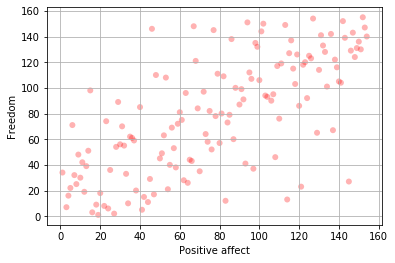

In [17]:
positive_affect = df['Positive affect']
freedom = df['Freedom']

fig, ax = plt.subplots()
ax.scatter(positive_affect, freedom, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('Positive affect')
plt.ylabel('Freedom')
plt.show()

# равномерное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [18]:
df1 = df.loc[df['Freedom'].isna() == False]

# Фильтруем выбросы по межквантильному расстоянию
q2 = df1['Freedom'].median()
q1 = df1['Freedom'].quantile(0.25)
q3 = df1['Freedom'].quantile(0.75)
iqr = q3 - q1
# Границы выбросов (outliers)
outliermin = max(q1 - 1.5*iqr, 0)
outliermax = q3 + 1.5*iqr
df1 = df1[(df1['Freedom'] <= outliermax) & (df1['Freedom'] >= outliermin)]

print('Медиана :', q2)
#statistics.mode(df['Freedom'])   -- мода - любое число из выборки
print('Мат. ожидание :', statistics.mean(df1['Freedom']))
print('Стандартное отклонение :', statistics.pstdev(df1['Freedom']))
print('Дисперсия :', statistics.pvariance(df1['Freedom']))
print('Максимум :', max(df1['Freedom']))
print('Минимум :', min(df1['Freedom']))
print('Размах :', max(df1['Freedom']) - min(df1['Freedom']))

#Выбросы:
df2 = df.loc[(df['Freedom'].isna() == True) | (df['Freedom'] < outliermin) |  (df['Freedom'] > outliermax)]
print('Выбросы :',[x for x in df2['Freedom'].values])

Медиана : 79.5
Мат. ожидание : 78.82857142857142
Стандартное отклонение : 44.9475794449399
Дисперсия : 2020.2848979591836
Максимум : 155.0
Минимум : 1.0
Размах : 154.0
Выбросы : []


Почему нельзя найти моду?

Распределение равномерное => все значения встречаются ровно один раз. Мода - любое число из выборки

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

 Rxy = 0.70  p_value = 0.00


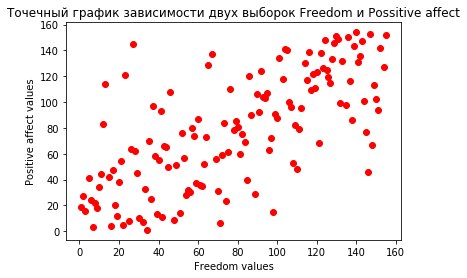

In [22]:
from scipy.stats import pearsonr
x = df1['Freedom']
y = df1['Positive affect']

corr , p_value = pearsonr(x, y)
print(f' Rxy = {corr:.2f}  p_value = {p_value:.2f}')
# Знак коэффициент показывает связь x и y: 
# + прямопорциональная, - обратнопропорциональная
# p_value - вероятность того, что такие данные могут быть получены при полном отсутствии связи между величинами

plt.xlabel('Freedom values')
plt.ylabel('Positive affect values')
plt.title('Точечный график зависимости двух выборок Freedom и Possitive affect')
plt.scatter(x,y, c = 'Red')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# fit_transform - Вычитаем среднее и делим на стандартое отклонение (z масштабирование)
np_scaled = min_max_scaler.fit_transform(df1[['Freedom', 'Positive affect']])

# кладем 2 полученных столбца в фрейм
df_norm = pd.DataFrame(np_scaled)
df_norm.head()

,0,1
0,0.025974,0.261438
1,0.032468,0.150327
2,0.012987,0.098039
3,0.038961,0.013072
4,0.116883,0.071895


Построить матрицу корреляций для всех колонок таблицы

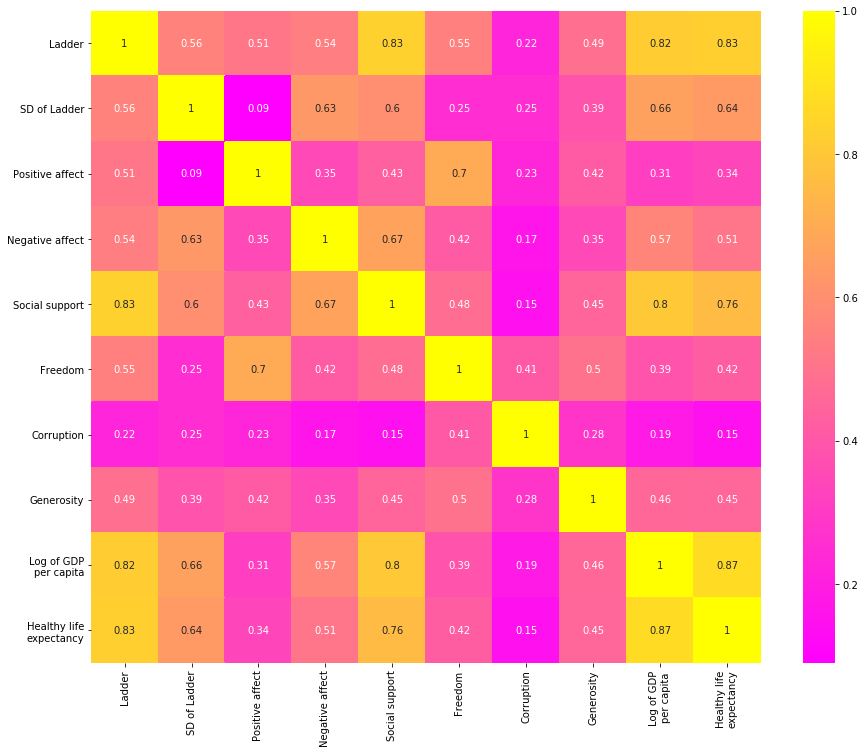

In [24]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='spring')
plt.gcf().set_size_inches(15,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [27]:
df_2 = pd.read_csv('avocado.csv')
df_2[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

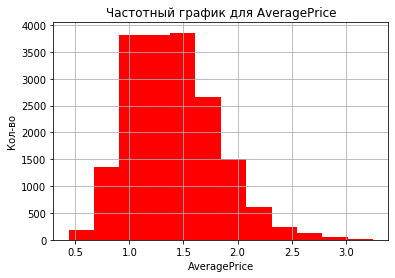

In [28]:
plt.hist(df_2['AveragePrice'], 12, facecolor = 'r')
plt.xlabel('AveragePrice')
plt.ylabel('Кол-во')
plt.title('Частотный график для AveragePrice')
plt.grid(True)
plt.show()

# Нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

 Rx1y = -0.21
 Rx2y = -0.17
 Rx3y = -0.18


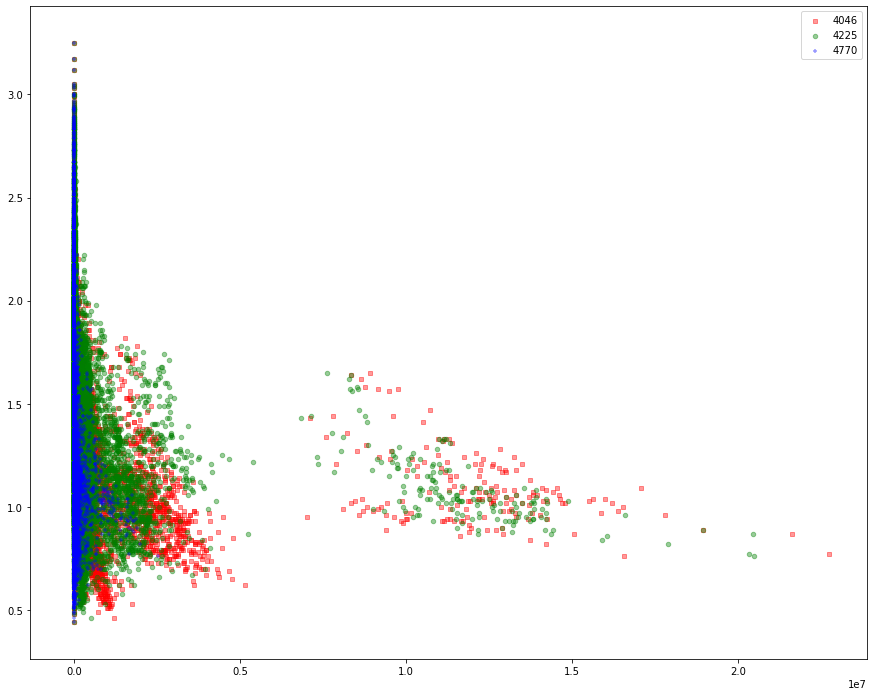

In [30]:
#from scipy.stats import pearsonr
x1 = df_2['4046']
x2 = df_2['4225']
x3 = df_2['4770']
y = df_2['AveragePrice']

corr1 , p_value1 = pearsonr(x1, y)
print(f' Rx1y = {corr1:.2f}')
corr2 , p_value2 = pearsonr(x2, y)
print(f' Rx2y = {corr2:.2f}')
corr3 , p_value3 = pearsonr(x3, y)
print(f' Rx3y = {corr3:.2f}')


x1 = df_2['4046']
x2 = df_2['4225']
x3 = df_2['4770']
y = df_2['AveragePrice']

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y, s= 20, alpha = 0.4, c='r', marker="s", label='4046')
ax1.scatter(x2,y, s= 20, alpha = 0.4, c='g', marker="o", label='4225')
ax1.scatter(x3,y, s= 20, alpha = 0.4, c='b', marker="+", label='4770')

plt.legend(loc='upper right')

plt.gcf().set_size_inches(15,12)
plt.show()